Index(['longestKill', 'matchDuration', 'rankPoints', 'walkDistance'], dtype='object')


original shape of data:    (500, 4)
transformed shape of data using PCA: (500, 2)


centroids: 
 [[-0.34935047 -0.83912682]
 [-0.99283518  1.05947535]
 [ 2.79398253 -0.08958217]
 [ 0.77068842  1.01983175]]


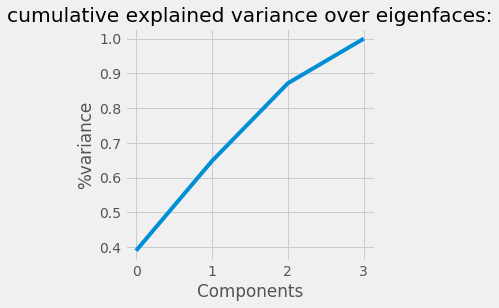

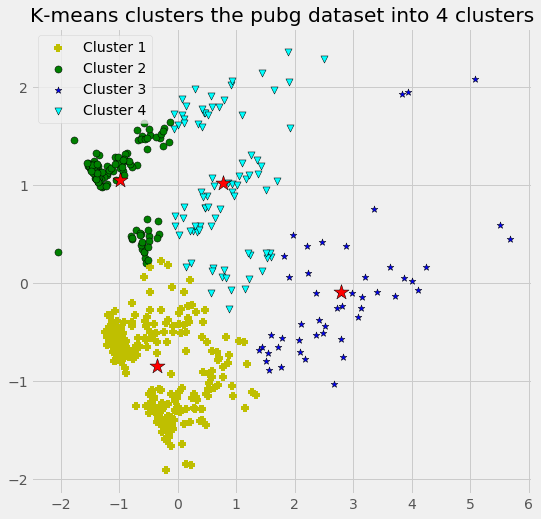

In [61]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import style
from sklearn.decomposition import PCA
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

style.use("ggplot")

def components(a):      # creating the function to take out the min components by analysing the 
                        #variance graph
   b=[]                 # creating the list b to take the components containing max variance
   for i in range(len(a)): 
        if (a[i]<0.7):         # by graph analysis taking components with variance less than 70%
              b.append(a[i])             
   return(b)                  # returning the values to main function

#MAIN CODE
# Reading the data file 
data = pd.read_csv(r'C:\Users\Admin\.jupyter\pubg_dataset.csv',index_col=0,header=0)
print(data.columns)

# Standardizing the values by unit range 
scaler = StandardScaler().fit(data)
rescaled_data = scaler.transform(data)

# Applying PCA model
pca= PCA(svd_solver='randomized')  # using random solver
pca.fit(rescaled_data)  # fitting data to pca model

# Cumulative explained variance over eigenfaces
with plt.style.context('fivethirtyeight'):
    plt.figure(figsize=(4,4));
    plt.title("cumulative explained variance over eigenfaces:");
    plt.xlabel("Components");
    plt.ylabel("%variance");
    plt.plot(pca.explained_variance_ratio_.cumsum());
    
a= pca.explained_variance_ratio_.cumsum()   
    
# By analysing the graph considering the components with variance less than 70%
load= components(a)  # calling the function components
n=len(load) # there are 204 pca components showing max variance
pca = PCA(n_components=n,svd_solver='randomized')  # applying PCA on these selected components
pca.fit(rescaled_data)   # fitting the data
rescaled_data_pca = pca.transform(rescaled_data) 
print("\n")
print("original shape of data:   ", rescaled_data.shape)             # printing the original data
print("transformed shape of data using PCA:", rescaled_data_pca.shape) #printing the pca transformed data 
print("\n")

#KMEANS ANALYSIS FOR CLUSTER DESIGNING
kmeans = KMeans(n_clusters=4, random_state=10).fit(rescaled_data_pca)  # taking 4 clusters
centroids=kmeans.cluster_centers_                                      # calculating centroid of clusters
labels=kmeans.labels_                                              # taking labels of cluster
print("centroids: \n",centroids)                                   # printing centroid

# Plotting the scatter plot by passing the pca components for 4 different clusters 
with plt.style.context('fivethirtyeight'):                        
    plt.figure(figsize=(8,8));
    for i in range(0,rescaled_data_pca.shape[0]):          # taking for loop for plotting the data points 
          if labels[i] == 0:                               # label 0 = cluster1 
              c1 = plt.scatter(rescaled_data_pca[i,0],rescaled_data_pca[i,1],c='y',s=50,
                               marker='+',edgecolor='black')
          elif labels[i] == 1:                             # label 1 = cluster2
              c2 = plt.scatter(rescaled_data_pca[i,0],rescaled_data_pca[i,1],c='g',s=50,
                               marker='o',edgecolor='black')
          elif labels[i] == 2:                            #label 2 = cluster3 
              c3 = plt.scatter(rescaled_data_pca[i,0],rescaled_data_pca[i,1],c='b',s=50,
                               marker='*',edgecolor='black')
          elif labels[i] == 3:                            #label 3 = cluster4
              c4 = plt.scatter(rescaled_data_pca[i,0],rescaled_data_pca[i,1],c='cyan',s=50,
                               marker='v',edgecolor='black')                                                                     
    #plotting the centroid
    plt.scatter( centroids[:, 0],centroids[:, 1],s=250, marker='*',c='red', edgecolor='black',label='centroids')
    plt.legend([c1, c2,c3,c4],['Cluster 1', 'Cluster 2','Cluster 3','Cluster 4'])
    plt.title('K-means clusters the pubg dataset into 4 clusters')
    plt.show()
